In [1]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import random
from tools import *
from Data_import import data_frame,read_seasonal_occurrence_prob_21_years
from model_evaluation import *
from ClusterNN import cluster_NN,svm_classifier
tf.set_random_seed(1)
np.random.seed(1)
random.seed(1)
# Southern runway
Data = data_frame()
clusternn = cluster_NN()
pilot_train_ = Data.pilot_semi_learning_generator(semi_ratio = 1)
clusternn.train(Data,pilot_train_,train_steps = 500, BATCH_SIZE = 1024)


D:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from ae_ckpt\model_encoder_encodedDim4_cluaterDim4.ckpt
0, total loss = 10.055936813354492, reconstruct loss = 0.016296174377202988, cluster loss = 0.03852393850684166, calm loss = 4.052404880523682, pilot loss = 10.899455070495605, max interval = -9.369990348815918, 
Train ACC: 0.660377358490566, PTA: 0.7666015625, Test ACC: 0.625
1, total loss = 10.001378059387207, reconstruct loss = 0.0169909056276083, cluster loss = 0.03950373828411102, calm loss = 4.034604072570801, pilot loss = 10.835138320922852, max interval = -9.332804679870605, 
Train ACC: 0.660377358490566, PTA: 0.755859375, Test ACC: 0.625
2, total loss = 9.947166442871094, reconstruct loss = 0.01685982570052147, cluster loss = 0.04131529852747917, calm loss = 4.0169267654418945, pilot loss = 10.77128791809082, max interval = -9.295979499816895, 
Train ACC: 0.660377358490566, PTA: 0.751953125, Test ACC: 0.625
3, total loss = 9.890018463134766, reconstruct loss = 0.01669946312904358, clus

{'ACC_TRAIN': array([[0.66037736],
        [0.66037736],
        [0.66037736],
        [0.66037736],
        [0.66037736],
        [0.66037736],
        [0.66037736],
        [0.6509434 ],
        [0.6509434 ],
        [0.6509434 ],
        [0.6509434 ],
        [0.64150943],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.63207547],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.62264151],
        [0.61320755],
        [0.61320755],
        [0.61320755],
        [0.60377358],
        [0.60377358],
        [0.60377358],
        [0.60377358],
        [0.60377358],
        [0.60377358],
        [0.59433962],
        [0.59433962

In [2]:
# Southern runway
corridor_month_2017 = Data.read_data_month(year=2017)
corridor_month_2018 = Data.read_data_month(year=2018)
corridor_month_2019 = Data.read_data_month(year=2019)
corridor_month_2020 = Data.read_data_month(year=2020)

In [3]:
corridor_months_south = []
for i in range(12):
    corridor_months_south.append(np.vstack((corridor_month_2017[i], corridor_month_2018[i], corridor_month_2019[i], corridor_month_2020[i])))
hazard_factors_months_south = clusternn.seasonal_statistic_fit(Data,corridor_months_south,pilot_train_)

INFO:tensorflow:Restoring parameters from ae_ckpt\model_encoder_encodedDim4_cluaterDim4.ckpt
INFO:tensorflow:Restoring parameters from sdec_ckpt\model_supervise.ckpt


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['font.family'] = 'Times New Roman'
def hazard_factor_ratio_cal(hazard_factors_months_i):
    hazard_factors_months = []
    for i in range(12):
        hazard_factors_months = hazard_factors_months+list(hazard_factors_months_i[i])
    hazard_factors_months = np.array(hazard_factors_months)
    percentitle_value = (np.quantile(hazard_factors_months,0.90))
    print(percentitle_value)
    ratio_hazard_factor_extremes = []
    for i in range(12):
        ratio_hazard_factor_extremes.append(np.sum(hazard_factors_months_i[i]>percentitle_value)/hazard_factors_months_i[i].size)
    return ratio_hazard_factor_extremes
def correlation_heatmap(train):
    correlations = train.corr(method='spearman')
    cmap = sns.diverging_palette(220,20, center='light',as_cmap=True)
    mask = np.zeros_like(correlations, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = False
    sns.heatmap(correlations, mask=mask, cmap=cmap, fmt='.2f',
    square=True, linewidths=.2, annot=True, vmax=0.99,cbar_kws={'shrink': .50,'extend':'both','pad':0.02}
    )
    plt.gca().add_patch(plt.Rectangle(xy=(0, 0),width=3,height=3,edgecolor='k',fill=False,linewidth=3))
    plt.gca().add_patch(plt.Rectangle(xy=(3, 3),width=5,height=5,edgecolor='k',fill=False,linewidth=3))
    plt.xticks([0.5,1.5],['21 years','2017~2020'])
    plt.yticks([0.5,1.5],['21 years','2017~2020'])
    plt.show(block=True)

32.709770977851136


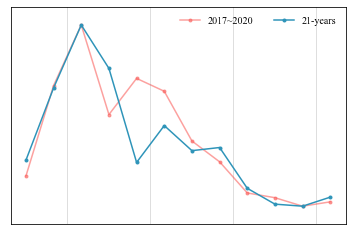

In [6]:
Occurrence_prob_21 = read_seasonal_occurrence_prob_21_years()

plt.plot(range(1,13),Occurrence_prob_21.normalize(hazard_factor_ratio_cal(hazard_factors_months_south)),label='2017~2020',marker='.',alpha=0.6,linewidth=1.5,color="#fa625f")
plt.vlines([2.5,5.5,8.5,11.5],[-0.5,-0.5,-0.5,-0.5],[1.5,1.5,1.5,1.5],colors='C7',linewidth=0.5,alpha=0.5)
plt.plot(range(1,13),Occurrence_prob_21.ratio_pilot_month_21_years_south[0],label='21-years',marker='.',color='#2E94B9',linewidth=1.5)
plt.ylim((-0.1,1.1))
plt.xticks(())
plt.yticks(())
plt.legend(frameon=False,ncol=2)
# plt.show(block=True)
plt.savefig(f'../figures/seasonal_occurrence_south.png',dpi=600)  #
plt.savefig(f'../figures/seasonal_occurrence_south.pdf')

32.709770977851136


D:\anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


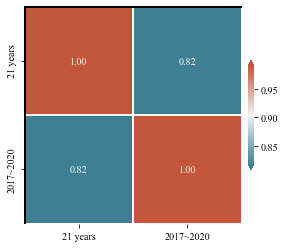

In [8]:
Occurrence_prob_21 = read_seasonal_occurrence_prob_21_years()
df = np.vstack((Occurrence_prob_21.ratio_pilot_month_21_years_south[0],hazard_factor_ratio_cal(hazard_factors_months_south))).T
df = pd.DataFrame(df)
correlation_heatmap(df)

Northern runway

In [9]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import random
from tools import *
from Data_import import data_frame,read_seasonal_occurrence_prob_21_years
from model_evaluation import *
from ClusterNN import cluster_NN,svm_classifier
tf.set_random_seed(1)
np.random.seed(1)
random.seed(1)
# Northern runway
Data = data_frame()
clusternn = cluster_NN()
Data.read_data_for_transfer_learning()
corridor_month_2020_transfer = Data.read_data_month_transfer(year=2020)
corridor_month_2021_transfer = Data.read_data_month_transfer(year=2021)

D:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [10]:
corridor_months_north = []
for i in range(12):
    corridor_months_north.append(np.vstack((corridor_month_2020_transfer[i],corridor_month_2021_transfer[i])))
Data.read_data_for_transfer_learning()
clusternn.transfer_learning(Data,Data.pilot_train_transfer,train_steps = 1000, BATCH_SIZE = 1024)
hazard_factors_months_north = clusternn.seasonal_statistic_fit_transfer(Data,corridor_months_north,Data.pilot_train_transfer)

INFO:tensorflow:Restoring parameters from ae_ckpt\model_encoder_encodedDim4_cluaterDim4.ckpt
INFO:tensorflow:Restoring parameters from sdec_ckpt\model_supervise.ckpt
0, total loss = -1.780018925666809, reconstruct loss = 0.10521600395441055, cluster loss = 0.04433736950159073, calm loss = 0.6168895959854126, pilot loss = 5.273406982421875, max interval = -13.404990196228027, 
Train ACC: 0.9, PTA: 0.4287109375, Test ACC: 0.7419354838709677
1, total loss = -1.808419942855835, reconstruct loss = 0.10295084863901138, cluster loss = 0.044317230582237244, calm loss = 0.6218396425247192, pilot loss = 5.287709712982178, max interval = -13.469799995422363, 
Train ACC: 0.9, PTA: 0.392578125, Test ACC: 0.7419354838709677
2, total loss = -1.8418176174163818, reconstruct loss = 0.10636231303215027, cluster loss = 0.04321380332112312, calm loss = 0.6197491884231567, pilot loss = 5.296112060546875, max interval = -13.529824256896973, 
Train ACC: 0.9, PTA: 0.388671875, Test ACC: 0.7419354838709677
3, 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['font.family'] = 'Times New Roman'
def hazard_factor_ratio_cal(hazard_factors_months_i):
    hazard_factors_months = []
    for i in range(12):
        hazard_factors_months = hazard_factors_months+list(hazard_factors_months_i[i])
    hazard_factors_months = np.array(hazard_factors_months)
    percentitle_value = (np.quantile(hazard_factors_months,0.90))
    print(percentitle_value)
    ratio_hazard_factor_extremes = []
    for i in range(12):
        ratio_hazard_factor_extremes.append(np.sum(hazard_factors_months_i[i]>percentitle_value)/hazard_factors_months_i[i].size)
    return ratio_hazard_factor_extremes
def correlation_heatmap(train):
    correlations = train.corr(method='spearman')
    cmap = sns.diverging_palette(220,20, center='light',as_cmap=True)
    mask = np.zeros_like(correlations, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = False
    sns.heatmap(correlations, mask=mask, cmap=cmap, fmt='.2f',
    square=True, linewidths=.2, annot=True, vmax=0.99,cbar_kws={'shrink': .50,'extend':'both','pad':0.02}
    )
    plt.gca().add_patch(plt.Rectangle(xy=(0, 0),width=3,height=3,edgecolor='k',fill=False,linewidth=3))
    plt.gca().add_patch(plt.Rectangle(xy=(3, 3),width=5,height=5,edgecolor='k',fill=False,linewidth=3))
    plt.xticks([0.5,1.5],['21 years','2020~2021'])
    plt.yticks([0.5,1.5],['21 years','2020~2021'])
    plt.show(block=True)

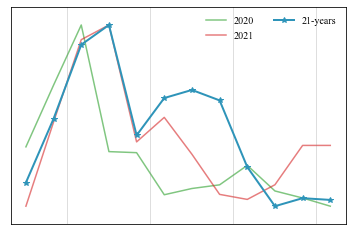

In [108]:
plt.plot(range(1,13),Occurrence_prob_21.normalize(hazard_factor_ratio_cal(hazard_factors_months_2020_transfer)),label='2020',alpha=0.6,color='C2')
plt.plot(range(1,13),Occurrence_prob_21.normalize(hazard_factor_ratio_cal(hazard_factors_months_2021_transfer)),label='2021',alpha=0.6,color='C3')
plt.vlines([2.5,5.5,8.5,11.5],[-0.5,-0.5,-0.5,-0.5],[1.5,1.5,1.5,1.5],colors='C7',linewidth=0.5,alpha=0.5)
plt.plot(range(1,13),Occurrence_prob_21.ratio_pilot_month_21_years_north[0],label='21-years',marker='*',color='#2E94B9',linewidth=2)
plt.ylim((-0.1,1.1))
plt.xticks(())
plt.yticks(())
plt.legend(frameon=False,ncol=2)
plt.show(block=True)

0.09916195241917523


D:\anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


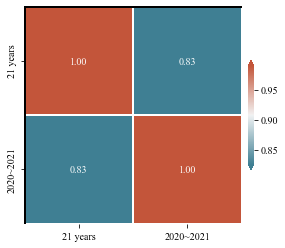

In [12]:
df = np.vstack((Occurrence_prob_21.ratio_pilot_month_21_years_north[0],
                hazard_factor_ratio_cal(hazard_factors_months_north))).T
df = pd.DataFrame(df)
correlation_heatmap(df)

0.09916195241917523


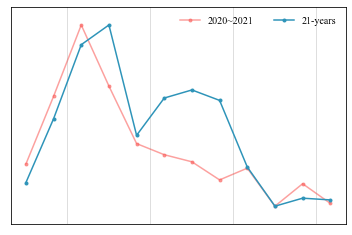

In [13]:
plt.plot(range(1,13),Occurrence_prob_21.normalize(hazard_factor_ratio_cal(hazard_factors_months_north)),label='2020~2021',marker='.',alpha=0.6,linewidth=1.5,color="#fa625f")
plt.vlines([2.5,5.5,8.5,11.5],[-0.5,-0.5,-0.5,-0.5],[1.5,1.5,1.5,1.5],colors='C7',linewidth=0.5,alpha=0.5)
plt.plot(range(1,13),Occurrence_prob_21.ratio_pilot_month_21_years_north[0],label='21-years',marker='.',color='#2E94B9',linewidth=1.5)
plt.ylim((-0.1,1.1))
plt.xticks(())
plt.yticks(())
plt.legend(frameon=False,ncol=2)
# plt.show(block=True)
plt.savefig(f'../figures/seasonal_occurrence_north.png',dpi=600)  #
plt.savefig(f'../figures/seasonal_occurrence_north.pdf')